# 6 Support Vector Machine
## 6.1 Kernels
Support Vector Machine can [use different kernels](https://en.wikipedia.org/wiki/Kernel_method): linear, radial basis function, polynomial, sigmoid, etc. The difference between some of them can be seen after running the code below that uses a classical example. Besides the usual packages, the *sklearn* package is also used here.

Accuracy: 82.00%


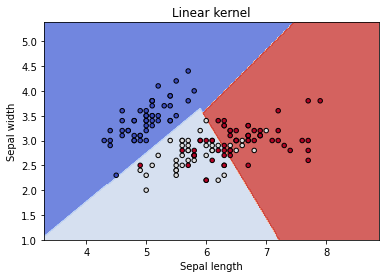

Accuracy: 82.67%


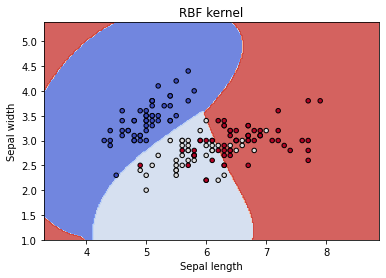

Accuracy: 81.33%


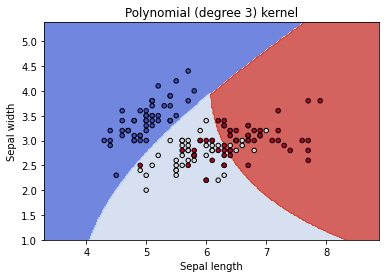

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#take the well-known iris dataset
iris = datasets.load_iris()
#we will use only sepal length and width
x=iris.data[:, :2]
y=iris.target

#plot points
x1, x2=x[:, 0], x[:, 1]
x_min, x_max=x1.min()-1, x1.max()+1
y_min, y_max=x2.min()-1, x2.max()+1
h=0.02
plot_x, plot_y=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#regularization
C=1.0  
models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(x, y) for model in models)

# title for the plots
titles = ("Linear kernel", "RBF kernel", "Polynomial (degree 3) kernel")


for model, title in zip(models, titles):
    points=model.predict(np.c_[plot_x.ravel(), plot_y.ravel()]).reshape(plot_x.shape)
    plt.contourf(plot_x, plot_y, points, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlim(plot_x.min(), plot_x.max())
    plt.ylim(plot_y.min(), plot_y.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    
    predicted=model.predict(x);
    print("Accuracy: %.2lf%%"%(100*np.sum(y==predicted)/y.size))
    
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    plt.show()

**Tasks**

1. What accuracies are achieved when other features are used as well?
  - More features make it harder to discern between examples, giving less acuracy
2. Split the dataset into a training and testing part, fit the SVM model on the training part, and test it on the testing part. What gives the highest accuracy?
  - Already split. Splits with s above 400 and below 700 seem to work well
3. Make the code below give over 90% accuracy and then explain how you achieved it and why did it work.
  - Change the kernel to rbf

In [2]:
import numpy as np
from sklearn import svm, datasets

n1=400
n2=400
n3=400

class1=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=2, high=8, size=n2)])+np.tile(np.array([[3/2, 0]]), (n1, 1))
class2=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=-1, high=4, size=n2)])
class3=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=-1, high=4, size=n2)])-np.tile(np.array([[3/2, 0]]), (n2, 1))

x=np.vstack((class1, class2, class3))
y=np.concatenate((np.ones((n1)), 2*np.ones((n2)), 3*np.ones((n2))))

idx=np.random.permutation(y.size)
x=x[idx, :]
y=y[idx]

#s=round((n1+n2)/2)
s=900

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

#EDIT ONLY FROM HERE...
model=svm.SVC(kernel="rbf")
model.fit(x_train, y_train)
#...TO HERE

predicted=model.predict(x_test);
print("Accuracy: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))


Accuracy: 80.00%


In [8]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
idx=np.random.permutation(y.size)
x=x[idx, :]
y=y[idx]

#all features
features_idx=range(x.shape[1])
#only some of the features
#features_idx=[0, 1]

x=x[:, features_idx]

s=round(y.size/2)

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

model=svm.SVC()
model.fit(x_train, y_train)

predicted=model.predict(x_test);
print("Accuracy: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

Accuracy: 61.80%


## 6.2 Wine dataset
Here we are going to make some experiments with the wine dataset to see how features can [affect](https://en.wikipedia.org/wiki/Feature_selection) the classification.

**Tasks**

1. Which SVM kernel will achieve the highest accuracy when all features are used?
  - Linear kernel
2. If you can use **only one** feature and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
3. If you can use **only two** features and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
4. How do you explain the results?
  - The more features are used, the better the linear kernel will perform

In [21]:
from sklearn.datasets import load_wine

def run_wine(features_idx, kernel):
  wine=load_wine()
  x=wine.data
  y=wine.target
  idx=np.random.permutation(y.size)
  x=x[idx, :]
  y=y[idx]

  x=x[:, features_idx]

  s=round(y.size/2)

  x_train=x[:s, :]
  y_train=y[:s]

  x_test=x[s:, :]
  y_test=y[s:]

  model=svm.SVC(kernel=kernel)
  model.fit(x_train, y_train)

  predicted=model.predict(x_test);
  #print("Accuracy: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))
  return "%.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size)

In [37]:
from tabulate import tabulate
kernels = ['linear', 'rbf', 'poly']

#all features
features_idx=range(x.shape[1])
#only some of the features
#features_idx=[0, 1]

print('Question 1')
results_1 = [['Kernel', 'Accuracy']]
for kernel in kernels:
  acc = run_wine(features_idx, kernel)
  results_1.append([kernel, acc])
print(tabulate(results_1, headers='firstrow'))

acc_list = [sublist[-1] for sublist in results_1[1:]]
index_max = max(range(len(acc_list)), key=acc_list.__getitem__)
print('Max Accuracy:',results_1[index_max+1])


print('\nQuestion 2')
results_2 = [['Kernel', 'Index', 'Accuracy']]
for kernel in kernels:
  for idx in features_idx:
    acc = run_wine([idx], kernel)
    results_2.append([kernel, idx, acc])
print(tabulate(results_2, headers='firstrow'))

acc_list = [sublist[-1] for sublist in results_2[1:]]
index_max = max(range(len(acc_list)), key=acc_list.__getitem__)
print('Max Accuracy:',results_2[index_max+1])

print('\nQuestion 3')
res = [[a, b] for idx, a in enumerate(features_idx) for b in features_idx[idx + 1:]]
results_3 = [['Kernel', 'Index Pair', 'Accuracy']]
for kernel in kernels:
  for idx in res:
    acc = run_wine(idx, kernel)
    results_3.append([kernel, idx, acc])
print(tabulate(results_3, headers='firstrow'))

acc_list = [sublist[-1] for sublist in results_3[1:]]
index_max = max(range(len(acc_list)), key=acc_list.__getitem__)
print('Max Accuracy:',results_3[index_max+1])

Question 1
Kernel    Accuracy
--------  ----------
linear    95.51%
rbf       58.43%
poly      59.55%
Max Accuracy: ['linear', '95.51%']

Question 2
Kernel      Index  Accuracy
--------  -------  ----------
linear          0  64.04%
linear          1  52.81%
linear          2  50.56%
linear          3  47.19%
linear          4  57.30%
linear          5  48.31%
linear          6  79.78%
linear          7  38.20%
linear          8  52.81%
linear          9  78.65%
linear         10  66.29%
linear         11  66.29%
linear         12  66.29%
rbf             0  66.29%
rbf             1  61.80%
rbf             2  42.70%
rbf             3  43.82%
rbf             4  64.04%
rbf             5  60.67%
rbf             6  82.02%
rbf             7  52.81%
rbf             8  55.06%
rbf             9  74.16%
rbf            10  60.67%
rbf            11  62.92%
rbf            12  68.54%
poly            0  70.79%
poly            1  44.94%
poly            2  42.70%
poly            3  52.81%
poly         

## 6.3 Speed
SVM is really great, but it has an important disadvantage with respect to neural networks in general. Here we are going to demonstrate it.

**Tasks**
1. Run the code below for various dataset sizes and each time store the time needed for the model to fit.
2. Draw a plot that shows the influence of dataset size on execution time.
3. How would you model the influence?
  - Exponential growth
4. How would you model the same influence in case of multilayer perceptron?
  - A Multilayer perceptron time complexity grows linearly with the number of examples, so it should be more efficient than a SVM

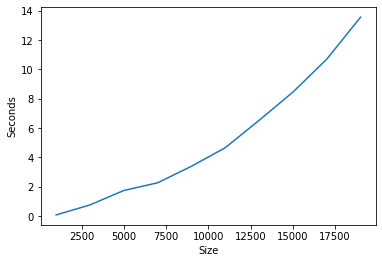

In [44]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt


def create_data(n1, n2):
    class1=np.c_[np.random.normal(0, 1, size=n1), np.random.normal(0, 1, size=n1)]
    class2=np.c_[np.random.normal(2, 1, size=n2), np.random.normal(0, 1, size=n2)]
    x=np.vstack((class1, class2))
    y=np.concatenate((np.ones((n1)), 2*np.ones((n2))))
    
    return x, y

times=[]
for i in range (1000, 20000, 2000):
  x, y=create_data(i, i)
  model=svm.SVC(kernel="linear", C=1.0)
  import time;
  start=time.time()
  model.fit(x, y)
  end=time.time();
  t=end-start
  times.append(t)

plt.xlabel('Size')
plt.ylabel('Seconds')
plt.plot(range (1000, 20000, 2000), times)
plt.show()
